In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import visuals as vs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler


pd.set_option('display.max_columns', None) # To display all columns


import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
wf = pd.read_csv('data/drug_workfile')
wf.head()

,Unnamed: 0,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Social_Drugs,Party_Drugs,Hard_Drugs
0,0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0
1,1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
2,2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1
4,4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0


In [3]:
X = wf[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
y = wf['Party_Drugs']

#### Train-Test-Split

In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 

#### Random Oversampling

In [5]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1698 samples.
Testing set has 564 samples.


#### Instanciating the model

In [17]:
clf = SVC(random_state = 420)

learner = clf.fit(X_train, y_train)

# Get the predictions on the test set,
# then get predictions on the full training samples
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

# Compute accuracy on the full training samples
acc_train = accuracy_score(y_train, predictions_train)

# Compute accuracy on test set
acc_test = accuracy_score(y_test, predictions_test)

# Compute F-score on the the full training samples
f_train = fbeta_score(y_train,predictions_train,beta=0.5)

# Compute F-score on the test set
f_test = fbeta_score(y_test,predictions_test,beta=0.5)

# Compute Precision

#### with f_beta_score 0.5

In [20]:
print (f'Accuracy on trainig data: {acc_train}')
print (f'Accuracy on testing data: {acc_test}')
print (f'F_beta_score on trainig data: {f_train}')
print (f'F_beta_score on test data: {f_test}')

Accuracy on trainig data: 0.8380447585394581
Accuracy on testing data: 0.776595744680851
F_beta_score on trainig data: 0.8524013075182298
F_beta_score on test data: 0.8529776674937964


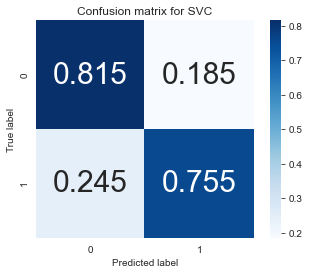

In [9]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure()
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
         cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for SVC');

In [22]:
predictions_train

array([0, 1, 1, ..., 0, 0, 0])